In [1]:
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal
import rasterio
import rasterio.plot as rioplot
import os
from osgeo import gdal
import shapefile
import shapely.geometry as shp
from rasterio import mask

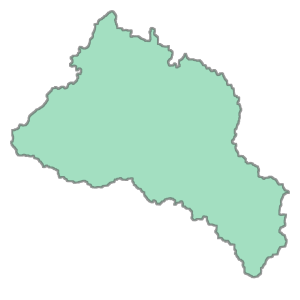

In [2]:
sf = shapefile.Reader("../scene_30m_mask.shp")
recs    = sf.records()
shapes  = sf.shapes()
Nshp    = len(shapes)
cns     = []

for nshp in  range(Nshp):
    ptchs   = []
    pts     = np.array(shapes[nshp].points)
    prt     = shapes[nshp].parts
    par     = list(prt) + [pts.shape[0]]
    poly = [shp.Polygon(pts[par[pij]:par[pij+1]]) for pij in range(len(prt))]
multipolygon2 = shp.MultiPolygon(poly)    
multipolygon2

In [3]:
datafiles = ["pr_2015-2014","pr_2015-2016"]
data_matrices = []
for files in datafiles:
    print(files)
    
# Read Prism file and Reproject it watershed mask
    input_prismfile = '../interimfiles/prism_diff_{}.tif'.format(files)
    input_raster = gdal.Open(input_prismfile)
    output_raster = 'test_epsg32611'
    gdal.Warp(output_raster,input_raster,dstSRS='EPSG:32611')

# Clip Reprojected Prism to watershed
    prism_new_projection = rasterio.open(output_raster)
    prism_diff_cropped = rasterio.mask.mask(prism_new_projection,multipolygon2,nodata = -9999,crop = True)
    
# Append to a matrix
    data_matrices.append(prism_diff_cropped[0])

# Deleting variables
    del input_prismfile, input_raster, output_raster, prism_new_projection, prism_diff_cropped

# Create Masked Array for plotting
data_for_plotting = np.reshape(np.array(data_matrices),(2,13,13))
data_for_plotting= np.ma.masked_values(data_for_plotting, -9999.)

pr_2015-2014
pr_2015-2016


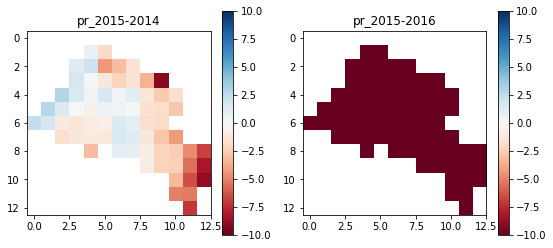

In [11]:
# Plotting
plt.figure(figsize=(14,14))
plot_number=1
for matrix in data_for_plotting:
   ax = plt.subplot(3,3, plot_number)
   plt.imshow(matrix, vmin = -10, vmax = 10,cmap = 'RdBu')
   plt.title(datafiles[plot_number-1])
   plot_number = plot_number + 1
   plt.colorbar()
plt.savefig('precipitation2.pdf')

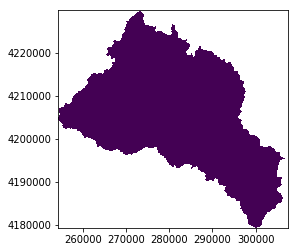

In [5]:
data_30m = rasterio.open('../scene_30m_mask.tif')
rioplot.show(data_30m, with_bounds=True)